In [2]:
#import libraries
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
#import dataset
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  

In [4]:
path1 = path1[0:480]
path2 = path2[0:480]
path3 = path3[0:480]
path4 = path4[0:480]

In [5]:
#hot encoding
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [6]:
#resize and add images with categories
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [7]:
data = np.array(data)
data.shape

(1920, 128, 128, 3)

In [8]:
result = np.array(result)
result = result.reshape((1920,4))
result.shape

(1920, 4)

In [9]:
#spliting the data
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle=True,random_state=42)

**CREATING MODEL**

In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,586,628 (128.12 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [11]:
y_train.shape 

(1632, 4)

In [12]:
x_train.shape

(1632, 128, 128, 3)

In [13]:
#train the model
history = model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10


I0000 00:00:1726478614.415496     115 service.cc:145] XLA service 0x7a47d4002140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726478614.415549     115 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726478614.415555     115 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  7/164 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3184 - loss: 47.7510

I0000 00:00:1726478622.134846     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


164/164 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.4543 - loss: 15.7449 - val_accuracy: 0.6111 - val_loss: 0.9061
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6648 - loss: 0.7733 - val_accuracy: 0.6979 - val_loss: 0.7415
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7451 - loss: 0.5848 - val_accuracy: 0.7465 - val_loss: 0.5882
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7930 - loss: 0.5050 - val_accuracy: 0.7986 - val_loss: 0.5025
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8403 - loss: 0.3924 - val_accuracy: 0.8160 - val_loss: 0.4684
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8511 - loss: 0.3906 - val_accuracy: 0.8438 - val_loss: 0.4361
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8762 - loss: 0.3284 - val_accuracy: 0.8507 - val_loss: 0.4395
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9116 - loss: 0.2422 - val_accuracy: 0.8

In [14]:
# Save the trained model to a .h5 file
model.save('/kaggle/working/alzheimers_model.h5')


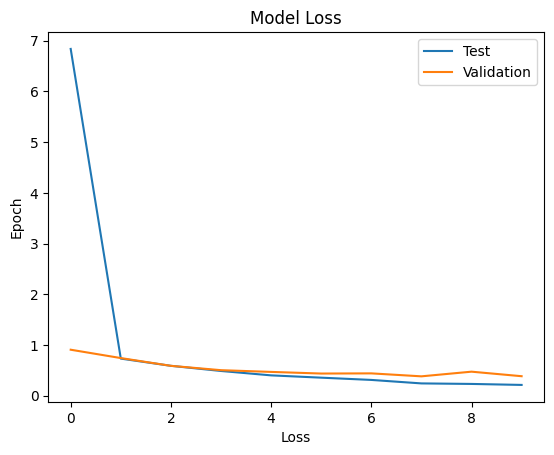

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

In [16]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia 

87.60696649551392% Confidence This Is Very Mild Dementia


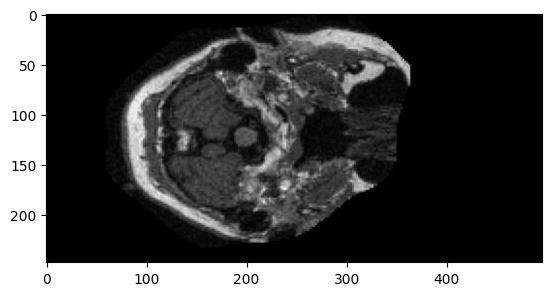

In [19]:
from matplotlib.pyplot import imshow
img = Image.open(r'/kaggle/input/imagesoasis/Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_100.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

In [20]:
import wandb
wandb.login()


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [21]:
wandb.init(project="alzheimers-prediction")


wandb: Currently logged in as: subhastembhare (subhastembhare-NITK). Use `wandb login --relogin` to force relogin


In [22]:
# Save your model locally
model.save('/kaggle/working/alzheimers_model.h5')

# Upload the model file to WandB
artifact = wandb.Artifact('alzheimers_model', type='model')
artifact.add_file('/kaggle/working/alzheimers_model.h5')
wandb.log_artifact(artifact)


<Artifact alzheimers_model>